####   혼동 행렬(confusion matrix)
- 클래스 분류 문제의 결과를 판단하는 기준 : (TP: True Positive)·(TN: True Negative)·(FP: False Positive)·(FN: False Negative)의 카운트로부터   적합률(precision)·재현율(recall)·F1값(F1-measure) 등의   평가 지표를 산출하거나 하면, 그 모델의 좋고 나쁜 것을 판단  

- sklearn.metrics
- 정답률(accuracy):accuracy_score()
- 적합율(precision):precision_score()
- 재현율(recall):recall_score()  

- F1 값(F1-measure):f1_score()
- 평가 지표를 함께 계산:classification_report()

#### 이진분류 0 = Negative, 1 = Positive  
       
|         |양성 예측 |  음성 예측|
| :--- | :---: | ---: |
|실제양성| TP (True Positive) |  FN (False Negative)|
|실제음성| FP (False Positive)|  TN (True Negative) |


In [1]:
#1. confusion_matrix
from sklearn.metrics import confusion_matrix

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  #실제값
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]  #예측값

cm = confusion_matrix(y_true, y_pred)

print(cm)

[[1 4]
 [3 2]]


In [2]:
#1-1.  confusion_matrix 데이터를 관리 ndarray  -> flatten()-> 1차원으로 변경 
import numpy as np
print(cm.flatten())
tn,fp,fn,tp=cm.flatten()
print(tn,fp,fn,tp)

[1 4 3 2]
1 4 3 2


In [3]:
#2. labels로 축의 순서를 지정   0 = A  1 = B
y_true_ab = ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']  #실제값
y_pred_ab = ['A', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B']  #예측값 

print(confusion_matrix(y_true_ab, y_pred_ab))


[[1 4]
 [3 2]]


In [4]:
#2-1 축을 변경해 보자.  
y_true_ab = ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
y_pred_ab = ['A', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B']

print(confusion_matrix(y_true_ab, y_pred_ab, labels=['B','A'])) #1 = A  0 = B


[[2 3]
 [4 1]]


In [5]:
#3. 다중 클래스 분류의 혼동 행렬   0,1,2 
y_true_multi = [0, 0, 0, 1, 1, 1, 2, 2, 2]
y_pred_multi = [0, 1, 1, 1, 1, 2, 2, 2, 2]

print(confusion_matrix(y_true_multi, y_pred_multi))

[[1 2 0]
 [0 2 1]
 [0 0 3]]


In [6]:
#3-1 축을 바꾸자. 특정라벨만 원하는 축으로 리턴받을 수 있다. 
print(confusion_matrix(y_true_multi, y_pred_multi, labels=[2,1]))

[[3 0]
 [1 2]]


[[1 4]
 [3 2]]


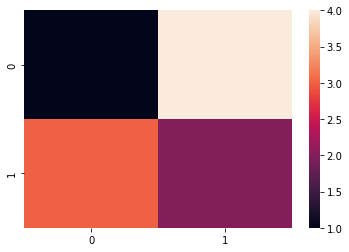

In [7]:
#4. 시각화 : 히트맵으로 시각화(seaborn 사용)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

cm = confusion_matrix(y_true, y_pred)

print(cm)
sns.heatmap(cm)
plt.savefig('sklearn_confusion_matrix.png')

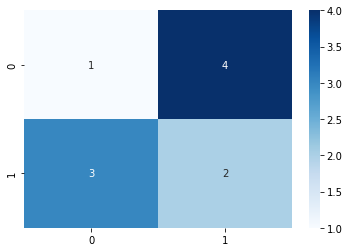

In [8]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.savefig('sklearn_confusion_matrix_annot_blues.png')

정답률

$$
Accuracy = \dfrac{TP + TN}{TP + FP + FN + TN}
$$

In [4]:
#5.정답률 : 모든 샘플중 정답한 샘플의 비율  
# 모든 샘플링의 결과 중 TP, TN 을 확인 한다. 
# TP, Tn이 높을 수록 성능이 좋다  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

cm = confusion_matrix(y_true, y_pred)
tn,fp,fn,tp=cm.flatten()
print(tn,fp,fn,tp)

print(accuracy_score(y_true, y_pred))

1 4 3 2
0.3


### 정답률만으로 판단이 안되는 이유?

| 대상|개수|야옹이 맞아 |야옹이 아니야|
| :--- | :---: | ---: |---: |
|사람| 900| 0|900|
|강아지| 50|0|50|
|염소| 15 | 0|15|
|버팔로|5 | 0|5|
|야옹이|30| 0|30|

#### 1)  야옹이만 Negative 라고 판정하는 기계학습이 되어버렸다. 새로운 데이터가 온다면 제대로 판정이 될까?  

#### 2) 얼마나 야옹이가 맞다고 판정할 수 있는지 성능평가를 하고 싶다  ->  적합률, 재현율,,,,


### 적합률
$$
Presision=\dfrac{TP}{TP + FP}
$$

In [2]:
#6.적합률 :PPV (Positive  prediction value) _ Positive로 생성된 샘플중에 정답 샘플의 비율 
#FP가 높으면 적합률이 낮아진다.  FP를 낮출 때 사용한다.  
from sklearn.metrics import precision_score

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

print(precision_score(y_true, y_pred))

0.3333333333333333


In [3]:
#6.-1 FP를  낮추어서 결과를 리턴 해보자.  
from sklearn.metrics import precision_score

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

print(precision_score(y_true, y_pred, pos_label=0))

0.25


### 재현률
$$
Recall=\dfrac{TP}{TP + FN}
$$

In [3]:
#7. 재현률 _ TPR   :   True  Positive rate _ FN이 커지면 재현률이 작아진다. 
#[중요]  : 재현률과 적합률은 분류 클래스를 양성, 음성에 따라 결과가 많이 달라진다. 
from sklearn.metrics import recall_score

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]


print(recall_score(y_true, y_pred))

0.4


### 1) 진짜 야옹이를 찾아보는  지표를 생각해서 다시한번 말그대로 재현
| 대상|개수|야옹이 맞아 |야옹이 아니야|
| :--- | :---: | ---: |---: |
|사람| 900| 0|900|
|강아지| 50|0|50|
|염소| 15 | 0|15|
|버팔로|5 | 0|5|
|야옹이|30| 0|30|

$$
재현률 =
\dfrac {TP}{TP+FN}=\dfrac{0}{0+30} =0
$$

### 2)다시  재학습을 시켜서 결과를 재확인 후 재현율 확인 
| 대상|개수|야옹이 맞아 |야옹이 아니야|
| :--- | :---: | ---: |---: |
|사람| 900| 2|898|
|강아지| 50|20|30|
|염소| 15 | 4|11|
|버팔로|5 | 1|4|
|야옹이|30| 27|3|

$$
재현률 =
\dfrac {TP}{TP+FN}=\dfrac{27}{27+3} =0.9
$$

### F1 값(F1-measure): f1_score()
$$
F1-measure = \dfrac {2*precision*recall}{precision+recall}=\dfrac{2*TP}{2*TP + FP+FN}
$$

In [13]:
#8.f1_score()를 사용하자  
#F1 : 적합률과 재현률의 조화 평균 -> 분류 클래스를 양성, 음성에 따라 결과가 많이 달라진다.  
from sklearn.metrics import f1_score

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

print(f1_score(y_true, y_pred))

0.3636363636363636


In [5]:
#9. classification_report()  
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

#print(classification_report(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=["class_0"," class_1"]))

              precision    recall  f1-score   support

     class_0       0.25      0.20      0.22         5
     class_1       0.33      0.40      0.36         5

    accuracy                           0.30        10
   macro avg       0.29      0.30      0.29        10
weighted avg       0.29      0.30      0.29        10



In [15]:
import pandas as pd
import pprint
res = classification_report(y_true, y_pred, output_dict=True)
pprint.pprint(res)

{'0': {'f1-score': 0.22222222222222224,
       'precision': 0.25,
       'recall': 0.2,
       'support': 5},
 '1': {'f1-score': 0.3636363636363636,
       'precision': 0.3333333333333333,
       'recall': 0.4,
       'support': 5},
 'accuracy': 0.3,
 'macro avg': {'f1-score': 0.29292929292929293,
               'precision': 0.29166666666666663,
               'recall': 0.30000000000000004,
               'support': 10},
 'weighted avg': {'f1-score': 0.29292929292929293,
                  'precision': 0.29166666666666663,
                  'recall': 0.3,
                  'support': 10}}
{'precision': 0.25, 'recall': 0.2, 'f1-score': 0.22222222222222224, 'support': 5}
0.25


In [8]:
#10. 부분 추출을 해보자.  
import pandas as pd
import pprint
res = classification_report(y_true, y_pred, output_dict=True)
#pprint.pprint(res)
print(res['0'])
print(res['0']['precision'])

{'precision': 0.25, 'recall': 0.2, 'f1-score': 0.22222222222222224, 'support': 5}
0.25


In [9]:
#11.판다스로 변환해서 출력해보자. -> 발표자료, 경진대회 
df= pd.DataFrame(res)
df

,0,1,accuracy,macro avg,weighted avg
precision,0.250000,0.333333,0.3,0.291667,0.291667
recall,0.200000,0.400000,0.3,0.300000,0.300000
f1-score,0.222222,0.363636,0.3,0.292929,0.292929
support,5.000000,5.000000,0.3,10.000000,10.000000


In [10]:
#12. dict -> 판다스  -> 원하는 지표만 클래스만 출력 해보자. 
print(df.iloc[:, :-3])


                  0         1
precision  0.250000  0.333333
recall     0.200000  0.400000
f1-score   0.222222  0.363636
support    5.000000  5.000000


In [11]:
#13. dict -> 판다스  -> 원하는 지표만 즉 점수만 출력 해보자. 
print(df.iloc[:, -3:])

           accuracy  macro avg  weighted avg
precision       0.3   0.291667      0.291667
recall          0.3   0.300000      0.300000
f1-score        0.3   0.292929      0.292929
support         0.3  10.000000     10.000000
